In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
import scipy.optimize as op 
import seaborn as sns
from __future__ import division


In [2]:
#Import the data in csv file
#1---Heart condition
#0---healthy

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Demarcate the features and the target variable
X = df.iloc[:,0:13] #collecting all required features 
y = df.iloc[:,13:14] #collecting the target variable

In [4]:
#Segregate the training and testing data, here the size of test samples is 20% of the total samples

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [5]:
#Creating numpy array for training data
X_train = np.vstack((np.asarray(X_train.age.values),\
               np.asarray(X_train.sex.values),\
               np.asarray(X_train.cp.values),\
               np.asarray(X_train.trestbps.values),\
               np.asarray(X_train.chol.values),\
               np.asarray(X_train.fbs.values),\
               np.asarray(X_train.restecg.values),\
               np.asarray(X_train.thalach.values),\
               np.asarray(X_train.exang.values),\
               np.asarray(X_train.oldpeak.values),\
               np.asarray(X_train.slope.values),\
               np.asarray(X_train.ca.values),\
               np.asarray(X_train.thal.values)))

y_train = np.asarray(y_train.target.values)

#Creating numpy array for testing data
X_test = np.vstack((np.asarray(X_test.age.values),\
               np.asarray(X_test.sex.values),\
               np.asarray(X_test.cp.values),\
               np.asarray(X_test.trestbps.values),\
               np.asarray(X_test.chol.values),\
               np.asarray(X_test.fbs.values),\
               np.asarray(X_test.restecg.values),\
               np.asarray(X_test.thalach.values),\
               np.asarray(X_test.exang.values),\
               np.asarray(X_test.oldpeak.values),\
               np.asarray(X_test.slope.values),\
               np.asarray(X_test.ca.values),\
               np.asarray(X_test.thal.values)))

y_test = np.asarray(y_test.target.values)

In [6]:
# The Logistic Function or the sigmoid function
#this will return binary vaues 0 or 1 based on the input z

def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

In [7]:
def FeatureScalingNormalizationMultipleVariables(X):
    # N.B.: this code is adapted for multiple variables
    
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1]) 
    

    # sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1]) 

    mu = np.vstack((X[0].mean(), \
                    X[1].mean(), \
                    X[2].mean(), \
                    X[3].mean(), \
                    X[4].mean(), \
                    X[5].mean(), \
                    X[6].mean(), \
                    X[7].mean(), \
                    X[8].mean(), \
                    X[9].mean(), \
                    X[10].mean(), \
                    X[11].mean(), \
                    X[12].mean()))
    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1),\
                       X[1].std(ddof=1),\
                       X[2].std(ddof=1),\
                       X[3].std(ddof=1),\
                       X[4].std(ddof=1),\
                       X[5].std(ddof=1),\
                       X[6].std(ddof=1),\
                       X[7].std(ddof=1),\
                       X[8].std(ddof=1),\
                       X[9].std(ddof=1),\
                       X[10].std(ddof=1),\
                       X[11].std(ddof=1),\
                       X[12].std(ddof=1)))     

    # number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

In [9]:
# Logistic Regression Cost Function
def calcCostFunction(theta, X, y):
    
    # number of training examples
    m,n = X.shape  
    
    # Calculate h = X * theta (we are using vectorized version)
    h = X.dot(theta) 
    
    # Calculate the Cost J
    J = -(np.sum(y * np.log(sigmoid(h)) + (1 - y) * np.log(1 - sigmoid(h)))/m)
    
    return J

In [10]:
# The Gradient Function
def calcGradient(theta, X, y):
    
    # number of training examples
    m,n = X.shape    
    
    # Calculate h = X * theta
    h = X.dot(theta)
    
    # Calculate the error = (h - y)
    error = sigmoid(h) - y
    
    # Calculate the new theta
    gradient = 1/m * (X.T).dot(error)
    
    return gradient

In [22]:
#make confusion matrix

def confusion_mat(y_test,y_bin_pred):
    tp=0
    fp=0
    fn=0
    tn=0
    
    for i in range(len(y_test)):  
        if y_test[i]==y_bin_pred[i]: #Correct prediction
                  if y_test[i]==1: #y_test=y_pred=1 ****TP**** 
                    tp=tp+1   
                  else:      #y_test=y_pred=0 ****TN**** 
                    tn=tn+1
        else:#Incorrect prediction
            if y_test[i]==1:
                fn=fn+1
            else:
                fp=fp+1
    con_vector=[tp,fp,fn,tn]
    return con_vector


In [12]:
# Calculate the accuracy
#The following code will give the matrix containing 1 or 0
#based on weather the corresponding value of [theta x X] matrix is greater than 0.5 or not 
def CalcAccuracy(theta, X, thresh):
    p = sigmoid(X.dot(theta)) >= thresh
    return p

In [13]:
#---------------------For training data--------------------
# Normalize X using the FeatureScalingNormalizationMultipleVariables function, and 
# copy the results in the "featuresNormalizeresults" list
features_Normalizeresults_train = FeatureScalingNormalizationMultipleVariables(X_train)

# get the normalized X matrix
X_train = np.asarray(features_Normalizeresults_train[0]).T

# get the mean
mu_train = features_Normalizeresults_train[1]

# get the sigma
sigma_train = features_Normalizeresults_train[2]

# number of training examples
m_train = len(y_train) 

# number of features
n = len(X_train)

#---------------------For testing data--------------------
# Normalize X using the FeatureScalingNormalizationMultipleVariables function, and 
# copy the results in the "featuresNormalizeresults" list
features_Normalizeresults_test = FeatureScalingNormalizationMultipleVariables(X_test)

# get the normalized X matrix
X_test = np.asarray(features_Normalizeresults_test[0]).T

# get the mean
mu_test = features_Normalizeresults_test[1]

# get the sigma
sigma_test = features_Normalizeresults_test[2]

# number of testing examples
m_test = len(y_test) 




In [14]:
# Add a column of ones to the array/matrix X ad add a column of '1's
X_train = np.vstack((np.ones(m_train), X_train)).T

# Add a column of ones to the array/matrix X ad add a column of '1's
X_test = np.vstack((np.ones(m_test), X_test)).T



In [15]:
# Gradient Descent Advanced Optimization: Update and find the optimal theta
m_train , n = X_train.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = calcCostFunction, 
                                 x0 = initial_theta, 
                                 args = (X_train, y_train),
                                 method = 'BFGS',
                                 jac = calcGradient);
theta = Result.x; #result having the variable x has updated theta value..<<Not to be confused with X=feature matrix>>>it is small x
message = Result.message # the message will indicate weather the optimization happended sucessfully or not.



In [16]:
y_pred=sigmoid(X_test@theta) #prob of (y=1|x;theta)
y_pred   

array([0.02718471, 0.84547728, 0.84841078, 0.01114626, 0.08022258,
       0.42459586, 0.05794483, 0.08565009, 0.00259892, 0.001296  ,
       0.81264189, 0.96328328, 0.02040558, 0.86869958, 0.98246204,
       0.72525307, 0.05002247, 0.75200496, 0.00366224, 0.85843907,
       0.85569032, 0.32143406, 0.06792685, 0.11881552, 0.91034655,
       0.62752365, 0.15145048, 0.35026209, 0.99218874, 0.69762911,
       0.66208015, 0.00882281, 0.98233672, 0.78334796, 0.95340438,
       0.74607217, 0.02154656, 0.86583808, 0.05758228, 0.12549432,
       0.82257031, 0.85603959, 0.3821133 , 0.05646138, 0.53690886,
       0.75411396, 0.8493011 , 0.65559448, 0.02813388, 0.83692765,
       0.86971327, 0.66809051, 0.98580139, 0.91648754, 0.99819483,
       0.10005675, 0.97495548, 0.96147548, 0.80030317, 0.97433181,
       0.82671723])

In [26]:
#confusion matrix for threshold =0.5
thresh1=0.5
y_bin_pred1=y_pred>thresh1
y_bin_pred1=y_bin_pred1.astype(int)
mat_confuse=confusion_mat(y_test,y_bin_pred1)
print(mat_confuse)
#tp,fp,fn,tn
tp=mat_confuse[0] #true positive
fp=mat_confuse[1] #false positive
fn=mat_confuse[2] #false negative
tn=mat_confuse[3] #true negative

print('True positive is: ',tp)
print('False positive is: ',fp)
print('False negative is: ',fn)
print('True negative is: ',tn)
print('******************************************************')

# precision = (TP) / (TP+FP)
pres=tp/(tp+fp)
#recall = (TP) / (TP+FN)
recal=tp/(tp+fn)
print('Precision: ',pres)
print('recall: ',recal)
y_binary_pred

[31, 6, 3, 21]
True positive is:  31
False positive is:  6
False negative is:  3
True negative is:  21
******************************************************
Precision:  0.8378378378378378
recall:  0.9117647058823529


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

**TPR/Recall/Sensitivity** is ratio of positive examples that are correctly identified.

**FPR** is the ratio of negative examples that are incorrectly classified.

**ROC(Receiver Operator Characteristic)** is nothing but the plot between TPR and FPR across all possible thresholds and **AUC (Area Under Curve)** is the entire area beneath this ROC curve.

**AUC(Area Under Curve)** measures how well a model is able to distinguish between classes.
 is a 

In [32]:
#this is to give the array of threshold entries<<<<<<<<<<<<<<0thentry--0 .....21st entry=1>>>>>>>>>>>>>>>>
i=0
thresh=0.05*np.ones(21)
while i<21: #the loop will run from 0 to 21; making our 21 entries <<<<<<<<<<<<<<0thentry--0 .....21st entry=1>>>>>>>>>>>>>>>>
    thresh[i]=thresh[i]*i
    i=i+1
thresh

61

In [33]:
#make a matrix stacked with y_bin_pred values at different thresholds.>>>
#This stacked matrix will contain 22 columns
#>> 1st column---initialization
#>> 22nd colunn-- contains y_bin_predict[21]
y_bin_pred=np.zeros(len(y_test))
for i in range(21):
    y_bin_pred=np.vstack((y_bin_pred,y_pred>thresh[i]))
    i=i+1

22

In [71]:
#For tpr and Fpr values
#each time a different y_bin_pred made from a different threshold comes, we compute its tpr and fpr and store them in seperate arrays

tpr_store=[0]#initialization
fpr_store=[0]
acc_store=[0]
i=1      #to ignore initilization values
while i<21:
    mat=confusion_mat(y_test,y_bin_pred[i]) # calling the confusion matrix vector
    #mat=[tp,fp,fn,tn]
    tpr=mat[0]/(mat[0]+mat[2]) #calculating the corresponding tps and fps
    fpr=mat[1]/(mat[1]+mat[3])
    acc=mat[0]/(mat[0]+mat[1]+mat[2]+mat[3]) #calculating the corresponding accuracy
    tpr_store=np.vstack((tpr_store,tpr))#storing the 21 tps and fps values
    fpr_store=np.vstack((fpr_store,fpr))
    acc_store=np.vstack((acc_store,acc))
    i=i+1
    
print('the tps store is: ', tpr_store)
print('the fps store is: ', fpr_store)
print('the acc store is: ', acc_store)


the tps store is:  [[0.        ]
 [1.        ]
 [1.        ]
 [0.94117647]
 [0.94117647]
 [0.94117647]
 [0.94117647]
 [0.94117647]
 [0.94117647]
 [0.91176471]
 [0.91176471]
 [0.91176471]
 [0.88235294]
 [0.88235294]
 [0.88235294]
 [0.82352941]
 [0.79411765]
 [0.70588235]
 [0.5       ]
 [0.32352941]
 [0.26470588]]
the fps store is:  [[0.        ]
 [1.        ]
 [0.66666667]
 [0.48148148]
 [0.37037037]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.2962963 ]
 [0.25925926]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.18518519]
 [0.11111111]
 [0.07407407]
 [0.07407407]
 [0.03703704]
 [0.03703704]
 [0.03703704]]
the acc store is:  [[0.        ]
 [0.55737705]
 [0.55737705]
 [0.52459016]
 [0.52459016]
 [0.52459016]
 [0.52459016]
 [0.52459016]
 [0.52459016]
 [0.50819672]
 [0.50819672]
 [0.50819672]
 [0.49180328]
 [0.49180328]
 [0.49180328]
 [0.45901639]
 [0.44262295]
 [0.39344262]
 [0.27868852]
 [0.18032787]
 [0.14754098]]


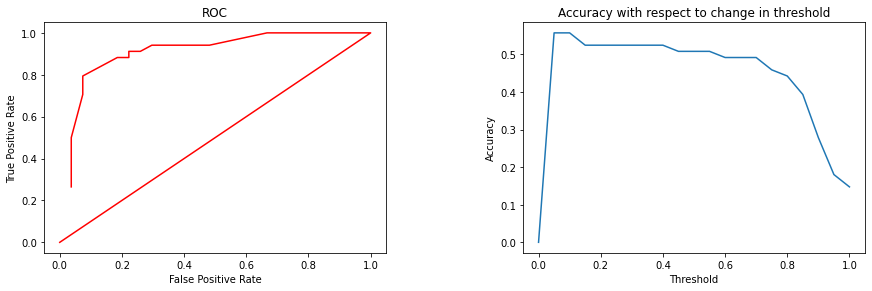

In [81]:
# plotting the points
# plt.plot(fpr_store, tpr_store, , label='ROC')
# plt.plot()
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2)

# For ROC
axis[0].plot(fpr_store, tpr_store,color='r')
axis[0].set_title("ROC")
axis[0].set_xlabel('False Positive Rate')
axis[0].set_ylabel('True Positive Rate')
  
# For accuracy
axis[1].plot(thresh,acc_store)
axis[1].set_title("Accuracy with respect to change in threshold")
axis[1].set_xlabel('Threshold')
axis[1].set_ylabel('Accuracy')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# function to show the plot
plt.show()


In [63]:
def integrate(y_vals, h):
    i = 1
    total = y_vals[0] + y_vals[-1]
    for y in y_vals[1:-1]:
        if i % 2 == 0:
            total += 2 * y
        else:
            total += 4 * y
        i += 1
    return total * (h / 3.0)

In [68]:
interval = 0.05
auc = integrate(tpr_store, interval)
print("The area under the curve (AUC) is", auc)

The area under the curve (AUC) is [0.82303922]
